# Trabajo practico I - Visión por computadora I



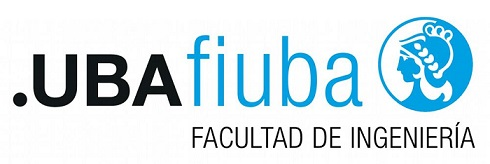

El objetivo de este trabajo práctico es aplicar los concpetos vistos en las clases 1 y 2 de la materia visión por computadora I de la Especialización en IA de la FIUBA

El trabajo práctico consta de 2 partes con varios objtetivos e incisos cada uno.
Primero cargaremos las libreriás necesarias para trabajar y luego se detalla cada parte y punto a analizar y trabajar, junto a sus conclusiones

## Cargamos las librerias necesarias

In [23]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

## Parte 1 (imágenes en white_patch y coord_cromaticas)

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

#### Cargamos las imagenes en color

In [2]:
img1 = cv.imread('./coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('./coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('./coord_cromaticas/CoordCrom_3.png')

#### Mostramos las imagenes originales

<Figure size 432x288 with 0 Axes>

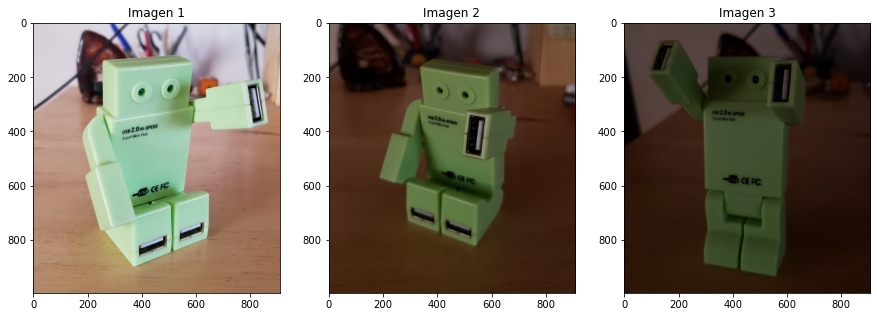

In [3]:
plt.figure()
fig, arr = plt.subplots(1,3,figsize=(15,15)) 
arr[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),   
arr[0].set_title('Imagen 1')
arr[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),
arr[1].set_title('Imagen 2')
arr[2].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)),
arr[2].set_title('Imagen 3')
plt.show()

#### Definimos la funcion para hacer el pasaje a coordenadas cromaticas

In [4]:
def pasaje_a_cromaticas(image_in:np.ndarray) -> np.ndarray: 
    image = np.float32(image_in).copy()
    '''
    Objetivo: esta funcion realiza el pasaje de una imagen a coordenadas cromáticas
    Para el caso del denominador = 0 se asigna al pixel un valor de 0 en la imagen convertida
    ---------------------------------------
    Argumentos
    image_in: Imagen de entrada
    ---------------------------------------
    Retorno
    image: (numpy.ndarray) con la imagen pasada a coordenadas cromáticas
    '''
    c1 = np.float16(image[:,:,0])
    c2 = np.float16(image[:,:,1])
    c3 = np.float16(image[:,:,2])
    suma = c1 + c2 + c3
    mascara = suma==0
    
    c1 = np.uint8(255*c1 / suma)
    c2 = np.uint8(255*c2 / suma)
    c3 = np.uint8(255*c3 / suma)
    c1[mascara]=0
    c2[mascara]=0
    c3[mascara]=0
    
    image = cv.merge((c1,c2,c3))

    return image

#### Hacemos el pasaje a coordenadas cromaticas de las 3 imagenes

In [5]:
img_crm1 = pasaje_a_cromaticas(img1)
img_crm2 = pasaje_a_cromaticas(img2)
img_crm3 = pasaje_a_cromaticas(img3)

C:\Users\Lio\AppData\Local\Temp\ipykernel_17428\3414593476.py:19: RuntimeWarning: invalid value encountered in true_divide
  c1 = np.uint8(255*c1 / suma)
C:\Users\Lio\AppData\Local\Temp\ipykernel_17428\3414593476.py:20: RuntimeWarning: invalid value encountered in true_divide
  c2 = np.uint8(255*c2 / suma)
C:\Users\Lio\AppData\Local\Temp\ipykernel_17428\3414593476.py:21: RuntimeWarning: invalid value encountered in true_divide
  c3 = np.uint8(255*c3 / suma)


#### Mostramos las imagenes original y las imagenes en coordenadas cromaticas

<Figure size 432x288 with 0 Axes>

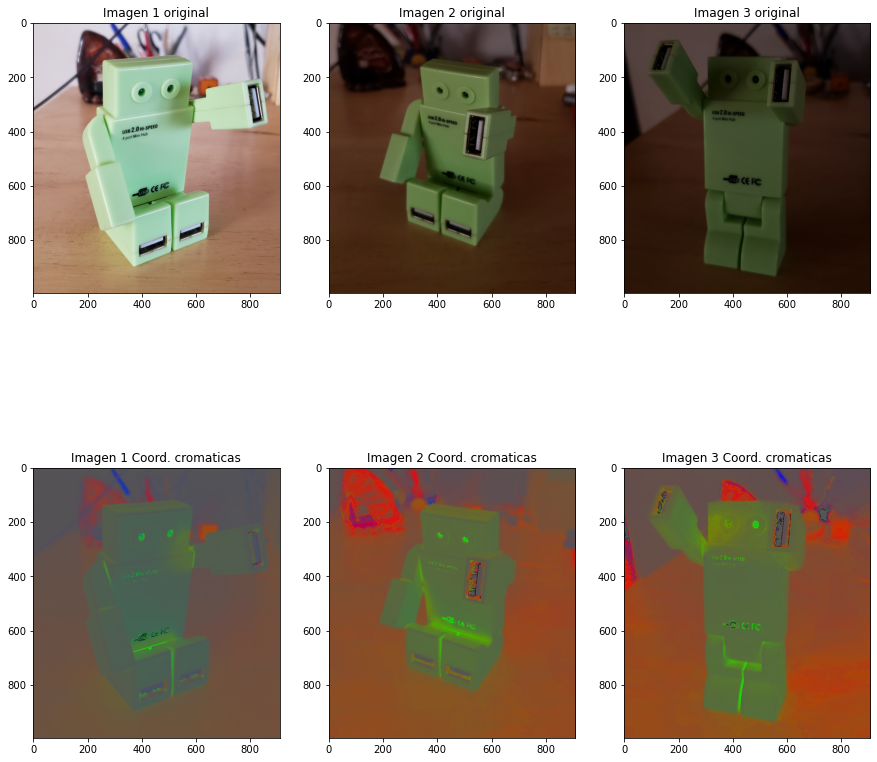

In [6]:
plt.figure()
fig, arr = plt.subplots(2,3,figsize=(15,15)) 
arr[0,0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)),
arr[0,0].set_title('Imagen 1 original')
arr[0,1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)),
arr[0,1].set_title('Imagen 2 original')
arr[0,2].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB)),
arr[0,2].set_title('Imagen 3 original')
arr[1,0].imshow(cv.cvtColor(img_crm1, cv.COLOR_BGR2RGB)),
arr[1,0].set_title('Imagen 1 Coord. cromaticas')
arr[1,1].imshow(cv.cvtColor(img_crm2, cv.COLOR_BGR2RGB)),
arr[1,1].set_title('Imagen 2 Coord. cromaticas')
arr[1,2].imshow(cv.cvtColor(img_crm3, cv.COLOR_BGR2RGB)),
arr[1,2].set_title('Imagen 3 Coord. cromaticas')
plt.show()

#### Resultados, conclusiones, fallos posibles del algoritmo

Para la implementacion del algoritmo se tuvo en cuenta que, dado que el mismo implica una división, el denominador se puede hacer 0, lo que genera un overflow en numpy (Se generan nans en estos casos de división por cero). 

Para subsanar esto, en el caso que algún valor del denominador sea 0 (esto ocurre cuando la suma de los 3 canales es 0 y como todos los valores son no negativos solo puede darse si los 3 canales son 0 al mismo tiempo), se generó una máscara que reconozca esto, de forma que todo valor cuyo denominador se haga 0, en la imagen de salida se le asigne el valor 0. Esto es coherente con lo que uno espera, dado que si los 3 canales son 0 significa que estamos en un pixel de color negro, y al asignarle como resultado el valor 0 estamos asignando el pixel en negro.

Por otro lado el algoritmo es simple de implementar y se puede calcular de forma vectorizada, lo que hace más rápida y eficiente su ejecución (con la máscara indicada arriba también es simple detectar los casos de denominador igual a 0 y ajustar como se indicó)

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

#### Definimos la funcion para implementar el algoritmo white-patch

In [7]:
def white_patch(image_in:np.ndarray,debug=False) -> (np.ndarray,bool): 
    image = np.float32(image_in).copy()
    '''
    Objetivo: esta funcion aplica el algoritmo white-patch a una imagen
    Para el caso del denominador = 0 se asigna al pixel un valor de 0 en la imagen convertida
    ---------------------------------------
    Argumentos
    image_in: Imagen de entrada
    debug: Un booleano que permite imprimir por consola los valores maximos por canal
    ---------------------------------------
    Retorno
    image: (numpy.ndarray) con la imagen procesada con el algoritmo white-patch
    cambio: (bool) un booleano que indica si la imagen cambio o habia no 
                (no cambia si c1_max=c2_max=c3_max=255)
    '''
    #Paso canales a float para operar
    c1 = np.float16(image[:,:,0])
    c2 = np.float16(image[:,:,1])
    c3 = np.float16(image[:,:,2])
    #Calculo maximo por canal
    c1_max = np.amax(c1)
    c2_max = np.amax(c2)
    c3_max = np.amax(c3)
    #Aplico el algoritmo por canal
    c1 = np.uint8(255*c1 / c1_max)
    c2 = np.uint8(255*c2 / c2_max)
    c3 = np.uint8(255*c3 / c3_max)
    #Si algun canal tiene maximo 0 lo dejo en 0
    if c1_max==0:
        c1[:,:]=0
    if c2_max==0:
        c2[:,:]=0
    if c3_max==0:
        c3[:,:]=0        
        
    if debug:
        print("c1_max {} - c2_max {} - c3_max {}".format(c1_max,c2_max,c3_max))
    
    #Armo la imagen de salida
    image = cv.merge((c1,c2,c3))
    cambio = True
    if (c1_max==255.0 and c2_max==255.0 and c3_max==255.0):
        cambio = False

    return image,cambio


#### Cargamos las imagenes en color y graficamos la imagen original y la convertida

c1_max 200.0 - c2_max 138.0 - c3_max 165.0


<Figure size 432x288 with 0 Axes>

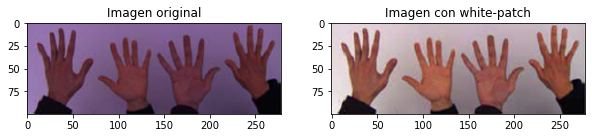




c1_max 171.0 - c2_max 250.0 - c3_max 210.0


<Figure size 432x288 with 0 Axes>

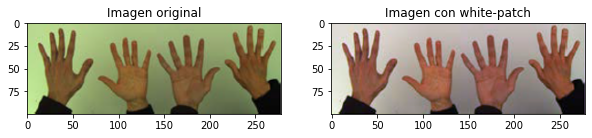




c1_max 175.0 - c2_max 157.0 - c3_max 247.0


<Figure size 432x288 with 0 Axes>

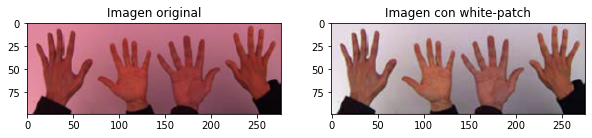




c1_max 255.0 - c2_max 255.0 - c3_max 255.0


<Figure size 432x288 with 0 Axes>

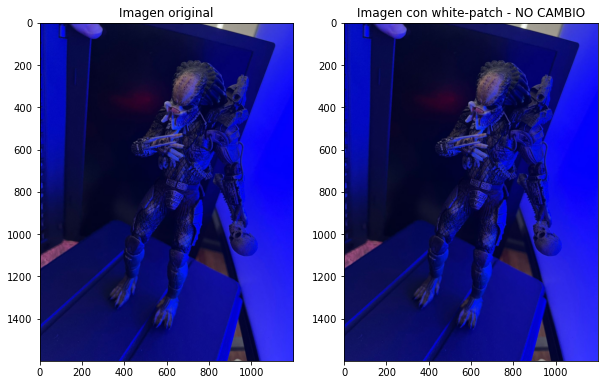




c1_max 155.0 - c2_max 252.0 - c3_max 126.0


<Figure size 432x288 with 0 Axes>

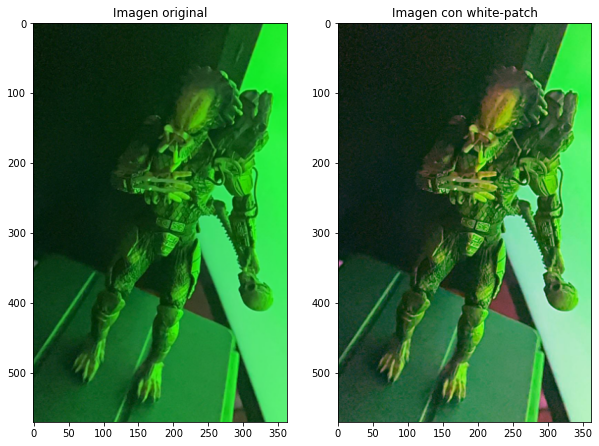




c1_max 172.0 - c2_max 255.0 - c3_max 170.0


<Figure size 432x288 with 0 Axes>

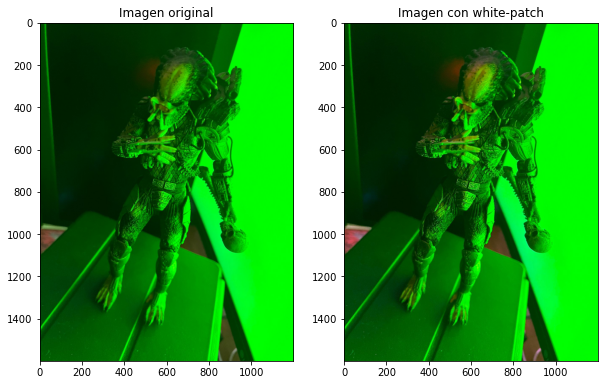




c1_max 255.0 - c2_max 166.0 - c3_max 168.0


<Figure size 432x288 with 0 Axes>

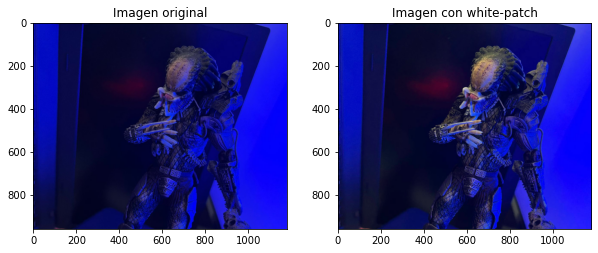




c1_max 122.0 - c2_max 134.0 - c3_max 255.0


<Figure size 432x288 with 0 Axes>

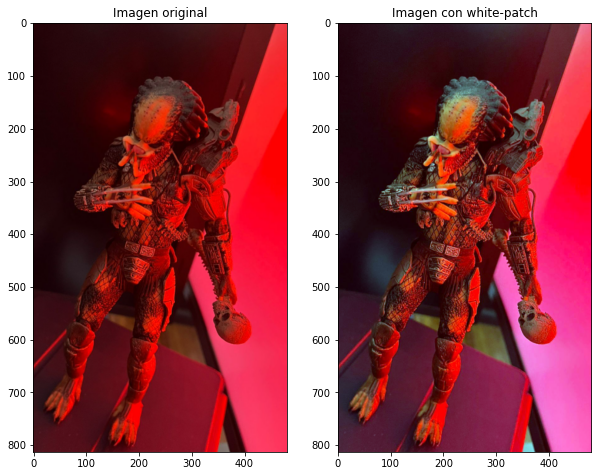




c1_max 203.0 - c2_max 201.0 - c3_max 255.0


<Figure size 432x288 with 0 Axes>

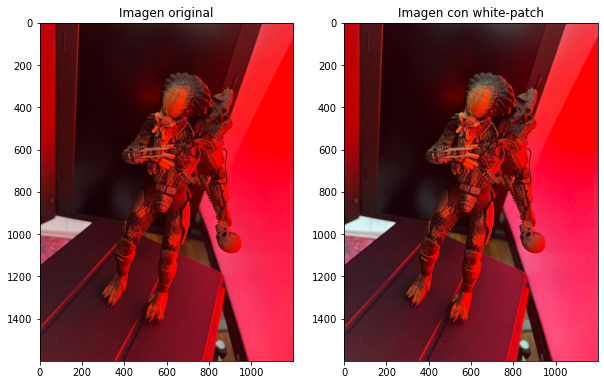

In [8]:
path_base = './white_patch/'
lista_archivos = ['test_blue.png','test_green.png','test_red.png','wp_blue.jpg','wp_green.png','wp_green3.jpg','wp_no_white.png','wp_red.png','wp_red2.jpg']
cant_archivos = len(lista_archivos)

for img_name in lista_archivos:
    #1- Cargo la imagen
    img = cv.imread(path_base+img_name)
    #2- Genero la imagen convertida a white-patch
    img_wp,cambio = white_patch(img,True)
    #3- Graficamos la imagen original y la convertida 
    plt.figure()
    fig, arr = plt.subplots(1,2,figsize=(10,20)) 
    arr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    arr[0].set_title('Imagen original')
    arr[1].imshow(cv.cvtColor(img_wp, cv.COLOR_BGR2RGB))
    titulo = 'Imagen con white-patch'
    if not cambio:
        titulo += ' - NO CAMBIO'
    arr[1].set_title(titulo)
    plt.show()
    print("\n\n")



#### Resultados, conclusiones, fallos posibles del algoritmo

En este caso nuevamente para la implementacion del algoritmo se tuvo en cuenta que, dado que el mismo implica una división, el denominador se puede hacer 0, lo que genera un overflow en numpy (Se generan nans en estos casos de división por cero). En este caso es mas dificil que suceda, dado que el máximo por canal debe ser 0, lo cual se dará solo si ese canal es 0 en toda la imagen.

Para subsanar esto se analiza el máximo de cada canal. Si alguno de esos máximos es 0 se coloca el canal completo en 0 en la salida.

Por otro lado el algoritmo tiene el problema que si el máximo por canal es 255 para los 3 canales, la imagen de salida no cambia respecto de la imagen de entrada, dado que canal queda sin alteraciones (cada canal se multiplica por 255 y se divide por el máximo del canal, al ser 255 el máximo el canal queda sin cambios). Esto es, si los 3 canales saturan en al menos 1 pixel cada uno, entonces van a terminar normalizando por el blanco puro (255, 255, 255).



## Parte 2

### 1.Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

#### Cargamos las imagenes en escalas de gris

In [9]:
img1_p2 = cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE)
img2_p2 = cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE)

In [10]:
print("Shape de imagen1: ",img1_p2.shape)
print("Shape de imagen2: ",img2_p2.shape)

Shape de imagen1:  (288, 287)
Shape de imagen2:  (288, 287)


#### Mostramos las imagenes

<Figure size 432x288 with 0 Axes>

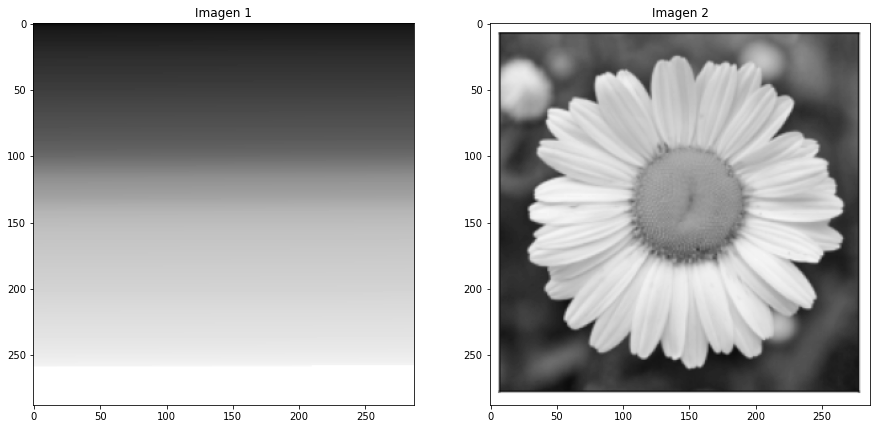

In [11]:
plt.figure()
fig, arr = plt.subplots(1,2,figsize=(15,15)) 
arr[0].imshow(img1_p2, cmap='gray', vmin=0, vmax=255)
arr[0].set_title('Imagen 1')
arr[1].imshow(img2_p2, cmap='gray', vmin=0, vmax=255)
arr[1].set_title('Imagen 2')
plt.show()

### 2.Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘ features ’ a ’ a los histogramas?

#### Probamos con diferente cantidad de bins y graficamos para cada imagen para ver los resultados y variaciones

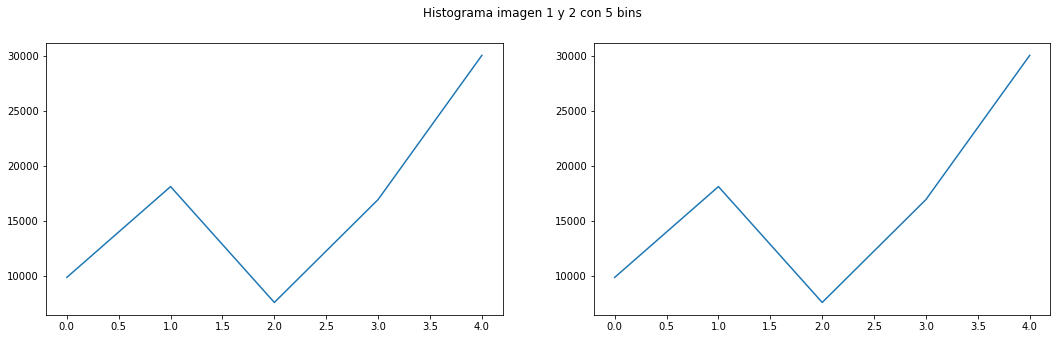

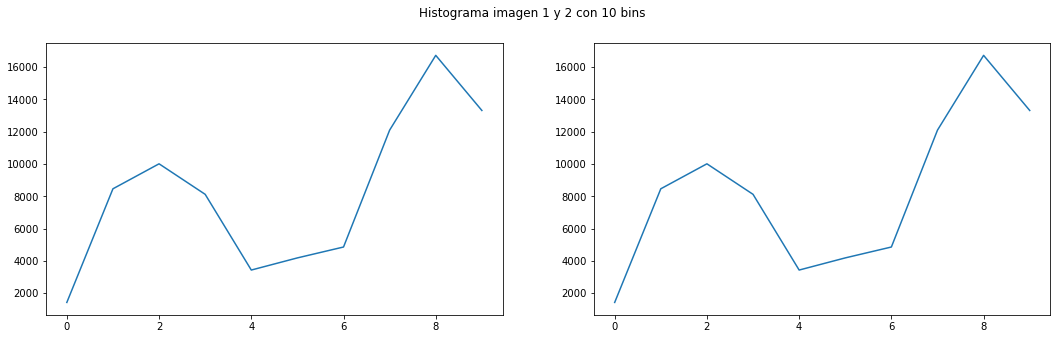

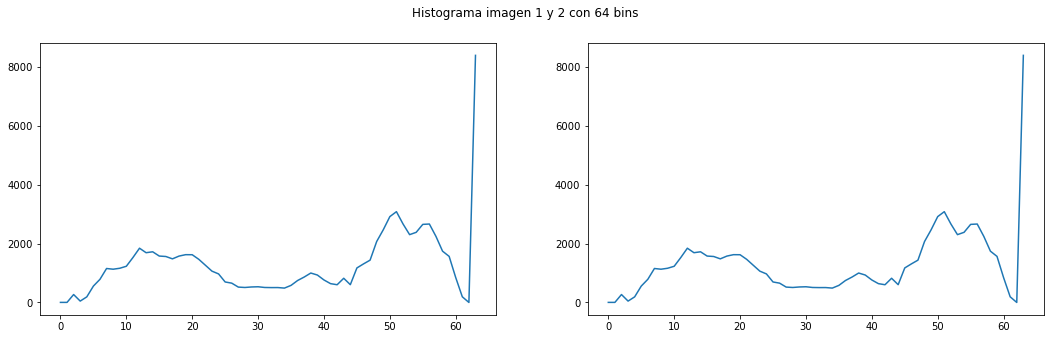

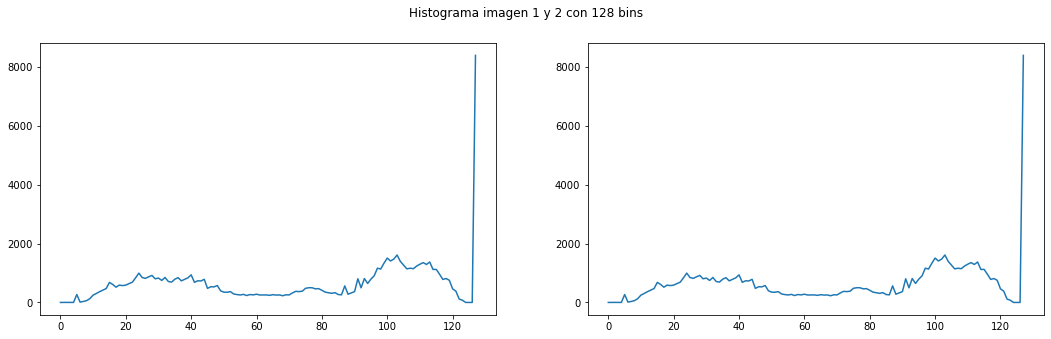

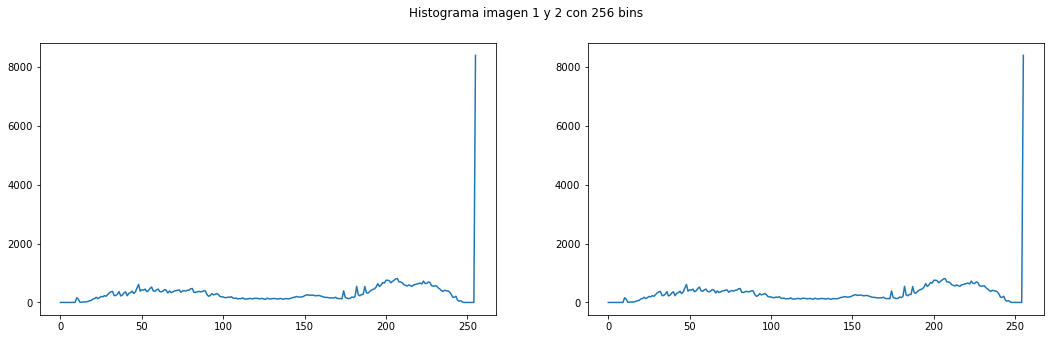

In [12]:
lista_bins = [5,10,64,128,256]

for bin in lista_bins:
    hist1,bins1 = np.histogram(img1_p2.ravel(),bin,[0,256])
    hist2,bins2 = np.histogram(img2_p2.ravel(),bin,[0,256])
    
    titulo ='Histograma imagen 1 y 2 con {} bins'.format(bin)
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,5))
    fig.suptitle(titulo)
    ax1.plot(hist1)
    ax2.plot(hist2)


### Conclusiones

Lo que vemos es que 2 imagenes muy diferentes tienen el mismo histograma asociado. Con lo cual no serviría utilizarlo en un modelo de clasificación/detección de imágenes, dado que ambas imágenes serían reconocidas de igual modo por el modelo. Esto podría suceder con otras imágenes. Quizás el histograma podría usarse, pero combinándolo con otras features de la imagen o consideracndo otras características y propiedades de las imagenes.

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

#### Cargamos la imagen en color

In [14]:
img_p3 = cv.imread('segmentacion.png')
img_p3 = cv.cvtColor(img_p3, cv.COLOR_BGR2RGB)

#### Mostramos la imagen

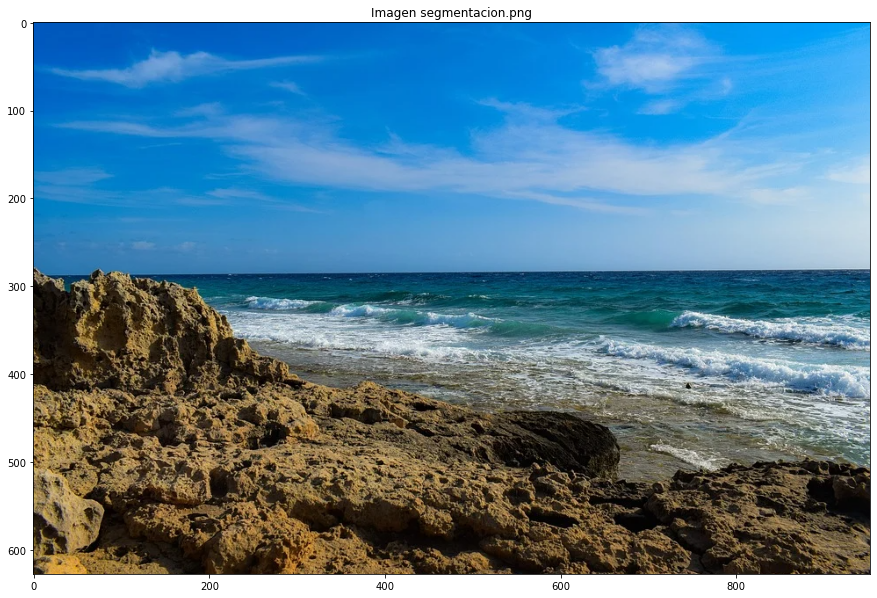

In [15]:
plt.figure(1,figsize=(15,15))
plt.imshow(img_p3)
plt.title('Imagen segmentacion.png')
plt.show()

#### Calculamos el histograma por cada canal

In [16]:
# 1- Separamos los canales de la imagen
c1, c2, c3 = cv.split(img_p3)

In [17]:
# 2- Calculamos el histograma de cada canal, tomando 256 bins
hist1,bins1 = np.histogram(c1.ravel(),256,[0,256])
hist2,bins2 = np.histogram(c2.ravel(),256,[0,256])
hist3,bins3 = np.histogram(c3.ravel(),256,[0,256])

<Figure size 432x288 with 0 Axes>

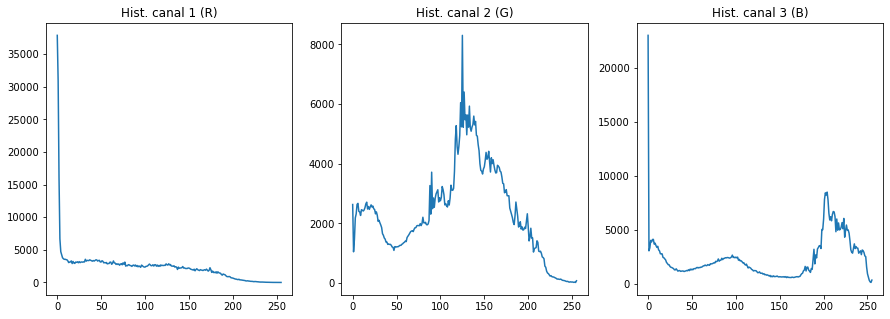

In [18]:
# 3- Ploteamos los 3 histogramas

plt.figure()
fig, arr = plt.subplots(1,3,figsize=(15,5)) 
arr[0].plot(hist1)
arr[0].set_title('Hist. canal 1 (R)')
arr[1].plot(hist2)
arr[1].set_title('Hist. canal 2 (G)')
arr[2].plot(hist3)
arr[2].set_title('Hist. canal 3 (B)')
plt.show()

#### Ploteamos cada canal en escala de grises

<Figure size 432x288 with 0 Axes>

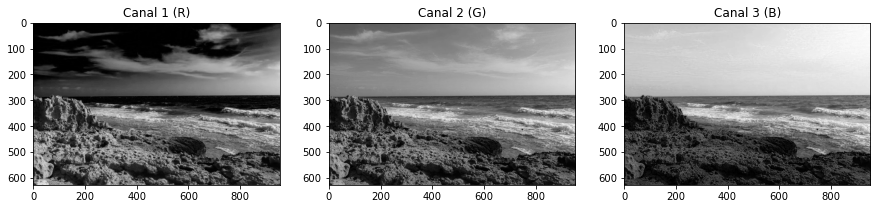

In [19]:
plt.figure()
fig, arr = plt.subplots(1,3,figsize=(15,5)) 
arr[0].imshow(c1,cmap='gray')
arr[0].set_title('Canal 1 (R)')
arr[1].imshow(c2,cmap='gray')
arr[1].set_title('Canal 2 (G)')
arr[2].imshow(c3,cmap='gray')
arr[2].set_title('Canal 3 (B)')
plt.show()

#### Definimos algunas Funciones auxiliares para visualizacion

In [20]:
def change_contrast(input_image:np.ndarray, contrast:int) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    contrast: Valor porcentual de contraste
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con el nuevo contraste
    '''
    img_new = (1 + contrast / 100) * input_image
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)
    # Hay que castear a 8 bits   
    img_new = img_new.astype('uint8')         

    return img_new

In [21]:
def change_brightness(input_image:np.ndarray, bright:int) -> np.ndarray: 
    '''
    Argumentos
    img: Imagen de entrada
    bright: Valor porcentual de brillo
    ---------------------------------------
    Retorno
    Imagen: (numpy.ndarray) con el nuevo brillo
    '''
    img_new = input_image + (255 * bright / 100)
    # Clip trunca a lo que se le diga (0 a 255)
    np.clip(img_new, 0, 255, out = img_new)
    # Hay que castear a 8 bits   
    img_new = img_new.astype('uint8')         

    return img_new

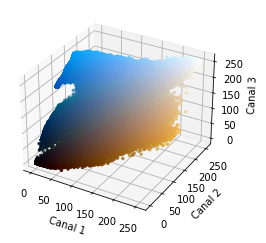

In [24]:
# Hacemos el plot en 3d de los canales
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_p3.reshape((np.shape(img_p3)[0]*np.shape(img_p3)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

#### Segmentamos la parte del cielo

<Figure size 432x288 with 0 Axes>

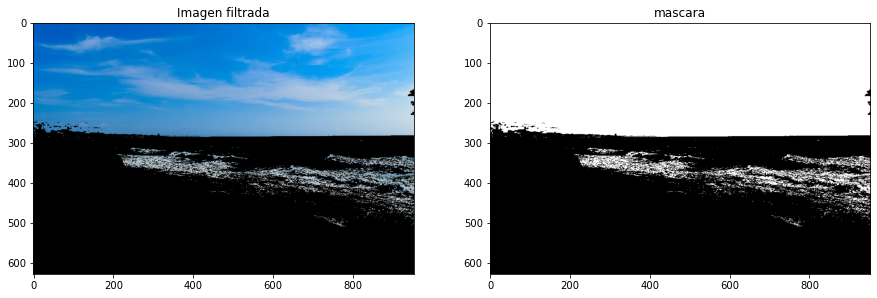

In [25]:
lower_limit = np.array([0,70,180])
upper_limit = np.array([255,220,255])

mask = cv.inRange(img_p3, lower_limit,  upper_limit)
img_segmentada = cv.bitwise_and(img_p3, img_p3, mask=mask)

plt.figure()
fig, arr = plt.subplots(1,2,figsize=(15,5)) 
arr[0].imshow(img_segmentada)
arr[0].set_title('Imagen filtrada')
arr[1].imshow(mask,cmap='gray')
arr[1].set_title('mascara')
plt.show()

#### Segmentamos la parte de la tierra

<Figure size 432x288 with 0 Axes>

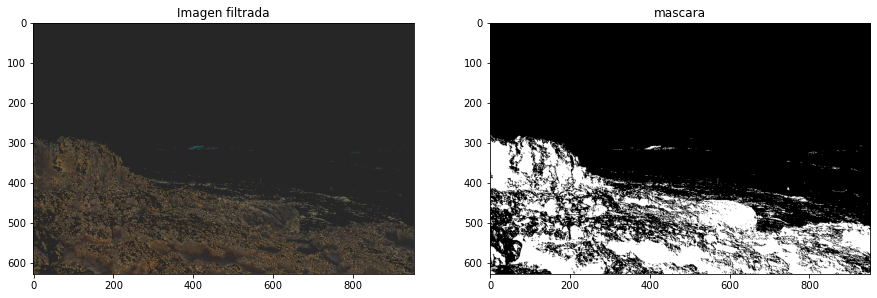

In [26]:
#lower_limit = np.array([0,0,0])
#upper_limit = np.array([200,100,60])
lower_limit = np.array([0,0,0])
upper_limit = np.array([200,90,60])

mask = cv.inRange(img_p3, lower_limit,  upper_limit)
img_segmentada = cv.bitwise_and(img_p3, img_p3, mask=mask)

new_bright = 15
img_segmentada2 = change_brightness(input_image=img_segmentada, bright=new_bright)

plt.figure()
fig, arr = plt.subplots(1,2,figsize=(15,5)) 
arr[0].imshow(img_segmentada2)
arr[0].set_title('Imagen filtrada')
arr[1].imshow(mask,cmap='gray')
arr[1].set_title('mascara')
plt.show()

#### Segmentamos la parte del agua

<Figure size 432x288 with 0 Axes>

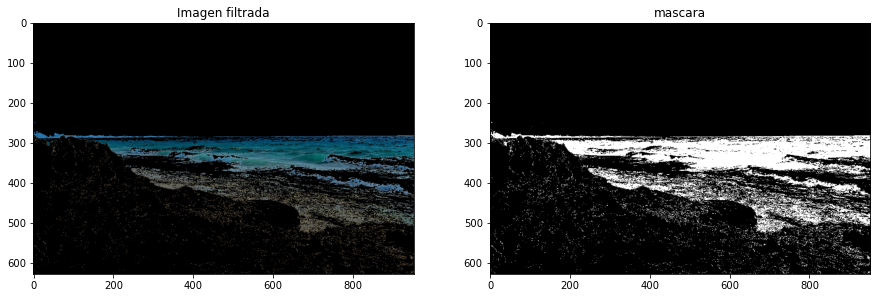

In [27]:
#lower_limit = np.array([0,60,65])
#upper_limit = np.array([120,165,175])
lower_limit = np.array([0,60,65])
upper_limit = np.array([120,165,175])

mask = cv.inRange(img_p3, lower_limit,  upper_limit)
img_segmentada = cv.bitwise_and(img_p3, img_p3, mask=mask)

plt.figure()
fig, arr = plt.subplots(1,2,figsize=(15,5)) 
arr[0].imshow(img_segmentada)
arr[0].set_title('Imagen filtrada')
arr[1].imshow(mask,cmap='gray')
arr[1].set_title('mascara')
plt.show()


### Probamos con otro sistema de coordenadas

Vamos a probar utilizando el espacio de color HSV, para ver si haciendo una máscara con este sistema de coordenadas mejoramos la segmentación

#### Pasamos la imagen al espacio de color HSV

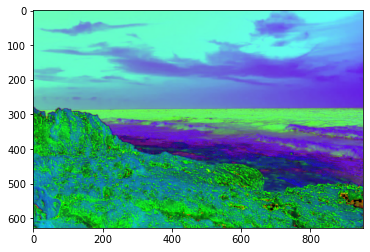

In [28]:
img_HSV = cv.cvtColor(img_p3, cv.COLOR_RGB2HSV)
plt.figure(5)
plt.imshow(img_HSV)

#### Ploteamos el histograma de la imagen en el nuevo espacio de color

<Figure size 432x288 with 0 Axes>

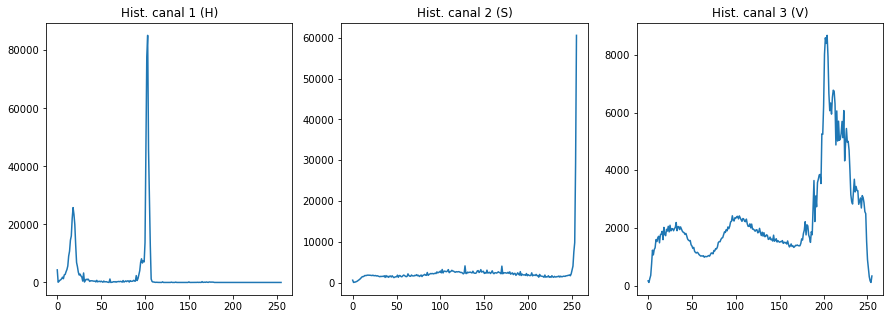

In [29]:
# 1- Separamos los canales de la imagen
c1h, c2h, c3h = cv.split(img_HSV)

# 2- Calculamos el histograma de cada canal, tomando 256 bins
hist1h,bins1h = np.histogram(c1h.ravel(),256,[0,256])
hist2h,bins2h = np.histogram(c2h.ravel(),256,[0,256])
hist3h,bins3h = np.histogram(c3h.ravel(),256,[0,256])

# 3- Ploteamos los 3 histogramas

plt.figure()
fig, arr = plt.subplots(1,3,figsize=(15,5)) 
arr[0].plot(hist1h)
arr[0].set_title('Hist. canal 1 (H)')
arr[1].plot(hist2h)
arr[1].set_title('Hist. canal 2 (S)')
arr[2].plot(hist3h)
arr[2].set_title('Hist. canal 3 (V)')
plt.show()



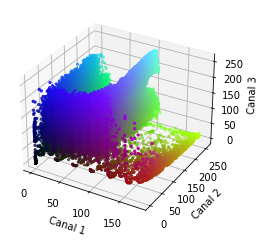

In [30]:
#Plotemos los canales en 3 dimensiones
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img_HSV.reshape((np.shape(img_HSV)[0]*np.shape(img_HSV)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1h.flatten(), c2h.flatten(), c3h.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()


#### Segmentamos la parte de la tierra con coordenadas HSV

<Figure size 432x288 with 0 Axes>

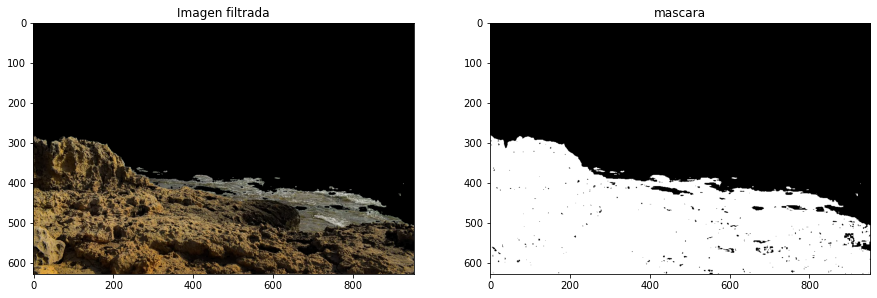

In [31]:
#lower_limit = (0,50,0)
#upper_limit = (50,200,255)
lower_limit = (0,0,0)
upper_limit = (50,255,255)

mask = cv.inRange(img_HSV, lower_limit,  upper_limit)
img_segmentada = cv.bitwise_and(img_p3, img_p3, mask=mask)

plt.figure()
fig, arr = plt.subplots(1,2,figsize=(15,5)) 
arr[0].imshow(img_segmentada)
arr[0].set_title('Imagen filtrada')
arr[1].imshow(mask,cmap='gray')
arr[1].set_title('mascara')
plt.show()

#### Segmentamos la parte del cielo con coordenadas HSV

<Figure size 432x288 with 0 Axes>

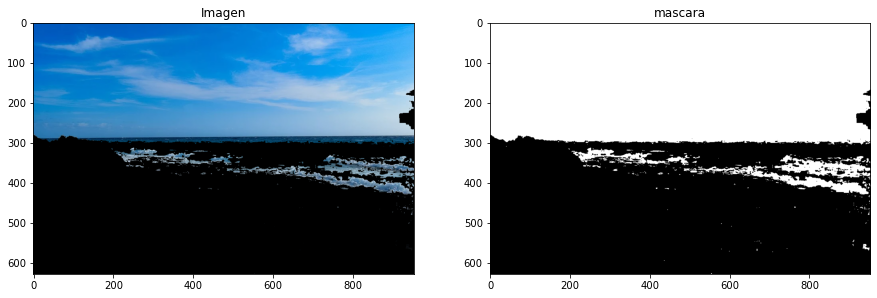

In [32]:
#lower_limit = (100,80,0)
#upper_limit = (110,255,255)
lower_limit = (100,40,0)
upper_limit = (110,255,255)

mask = cv.inRange(img_HSV, lower_limit,  upper_limit)
img_segmentada = cv.bitwise_and(img_p3, img_p3, mask=mask)
plt.figure()
fig, arr = plt.subplots(1,2,figsize=(15,5)) 
arr[0].imshow(img_segmentada)
arr[0].set_title('Imagen')
arr[1].imshow(mask,cmap='gray')
arr[1].set_title('mascara')
plt.show()

#### Segmentamos la parte del agua con coordenadas HSV

<Figure size 432x288 with 0 Axes>

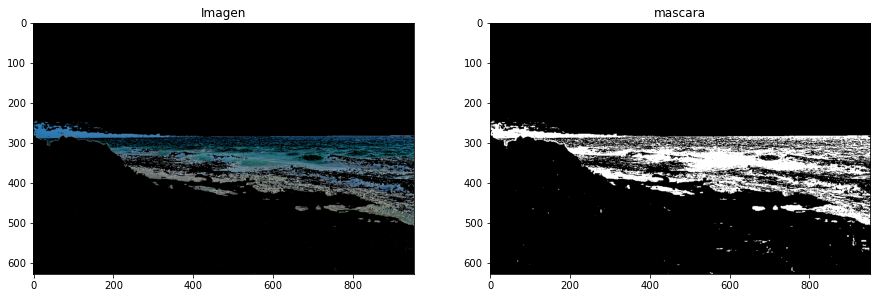

In [33]:
lower_limit = (40,0,0)
upper_limit = (105,240,180)

mask = cv.inRange(img_HSV, lower_limit,  upper_limit)
img_segmentada = cv.bitwise_and(img_p3, img_p3, mask=mask)
plt.figure()
fig, arr = plt.subplots(1,2,figsize=(15,5)) 
arr[0].imshow(img_segmentada)
arr[0].set_title('Imagen')
arr[1].imshow(mask,cmap='gray')
arr[1].set_title('mascara')
plt.show()

### Conclusiones

De los resultados obtenidos vemos que fue importante probar ocn otro espacio de color para hacer la segmentación. En HSV logramos obtener mejores máscaras que con el espacio de color RGB